In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

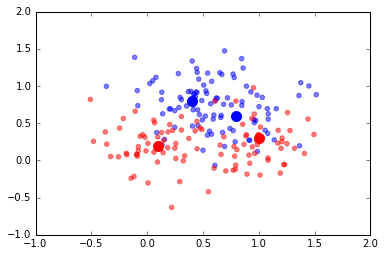

In [2]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

In [3]:
X_test, y_test = mysk.generate_points(seed = 1)

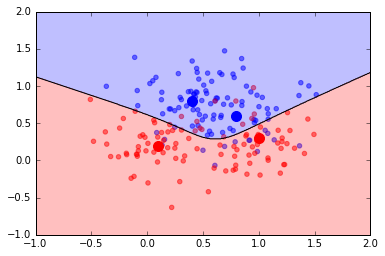

In [4]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

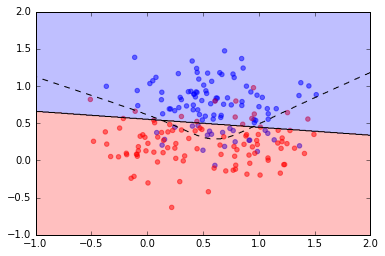

In [6]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(svc_model)
mysk.draw_bayes()

In [7]:
err_train = np.mean(y != svc_model.predict(X))
err_test = np.mean(y_test != svc_model.predict(X_test))
print err_train, err_test

0.185 0.225


In [8]:
print svc_model.coef_ # Коэффициенты разделяющей гиперплоскости
print svc_model.intercept_

[[-0.38696568 -3.61604174]]
[ 1.99884985]


In [9]:
def draw_sep_curve(model):
    x0_min, x0_max = plt.xlim()
    x1_min, x1_max = plt.ylim()
    x0 = np.linspace(x0_min, x0_max, 30)
    x1 = np.linspace(x1_min, x1_max, 30)
    X1, X0 = np.meshgrid(x1, x0)
    P = np.zeros(X0.shape)
    for i, x0i in enumerate(x0):
        for j, x1j in enumerate(x1):
            P[i, j] = model.decision_function([[x0i, x1j]])
    plt.contour(X0, X1, P, colors = 'k', levels=[-1, 0, 1], alpha = 0.8, linestyles=['--', '-', '--'])
    plt.xlim((x0_min, x0_max))
    plt.ylim((x1_min, x1_max)) 

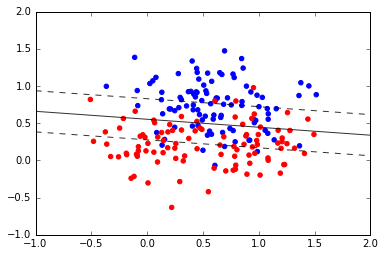

In [10]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y])
draw_sep_curve(svc_model)

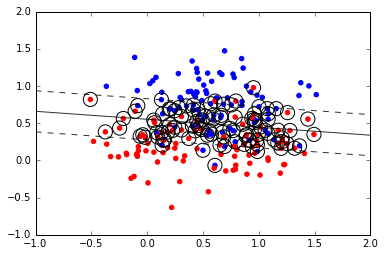

In [11]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y])
draw_sep_curve(svc_model)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s = 200, facecolors = 'none')

(-1, 2)

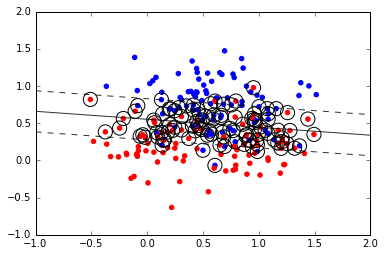

In [12]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y])
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s = 200, facecolors = 'none')
draw_sep_curve(svc_model)
plt.xlim((-1, 2))

<function __main__.draw_svc>

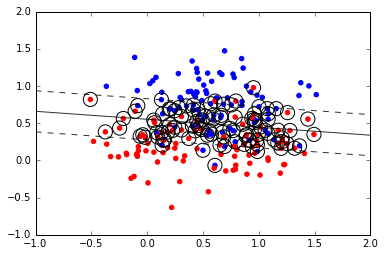

In [13]:
from IPython.html.widgets import interact

def draw_svc(C = 1):
    svc_model = SVC(kernel = 'linear', C = C)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y])
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
                s = 200, facecolors = 'none')
    draw_sep_curve(svc_model)
    plt.xlim((-1, 2))
    
interact(draw_svc, C = (0.01, 10, 0.01))    

## Ядра

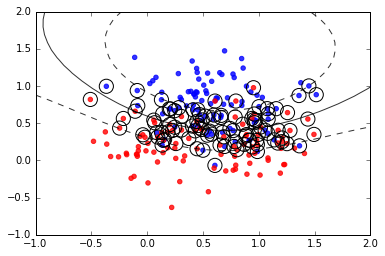

In [14]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y], alpha = 0.8)
draw_sep_curve(svc_model)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=200, facecolors='none')

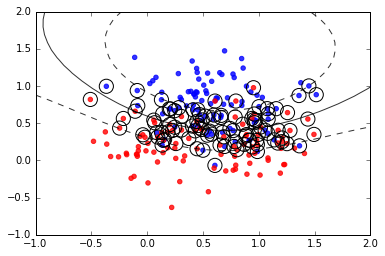

In [15]:
def draw_svc(C = 1, gamma = 0.5):
    svc_model = SVC(kernel = 'rbf', C = C, gamma = gamma)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y], alpha = 0.8)
    draw_sep_curve(svc_model)
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=200, facecolors='none')
    
interact(draw_svc, C = (0.01, 30, 0.01), gamma = (0, 50, 0.01))
pass

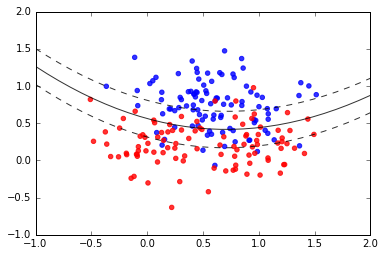

In [16]:
def draw_svc(C = 1, degree = 2, gamma = 0.5, coef0 = 10):
    svc_model = SVC(kernel = 'poly', C = C, degree = degree, 
                    gamma = gamma, coef0 = coef0)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y], alpha = 0.8)
    draw_sep_curve(svc_model)
    #plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
interact(draw_svc, C = (0.01, 30, 0.01), degree = (1, 8), gamma = (0, 1, 0.01))
pass

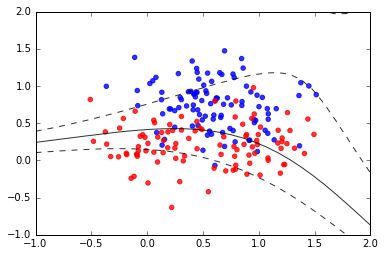

In [17]:
def draw_svc(C = 1, gamma = 0.5):
    svc_model = SVC(kernel = 'sigmoid', C = C, gamma = gamma, coef0 = 1)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r'])[y], alpha = 0.8)
    draw_sep_curve(svc_model)
    
    
interact(draw_svc, C = (0.01, 30, 0.01), gamma = (0, 1, 0.01))
pass